# Data Exploration

### Libraries

In [27]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

### Data

In [28]:
def load_filtered_data(city):
    '''
    Load filtered data from a city
    '''
    file = ['business', 'checkin', 'review', 'tip', 'user']
    data = {}
    for f in file:
        data[f] = pd.read_csv(f'../filtered_cities/{city}_{f}.csv')
    return data

In [29]:
# load data

city = 'St. Louis'
data = load_filtered_data(city)

#### Reviews

In [30]:
# review data

data['review'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63451 entries, 0 to 63450
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    63451 non-null  object
 1   user_id      63451 non-null  object
 2   business_id  63451 non-null  object
 3   stars        63451 non-null  int64 
 4   useful       63451 non-null  int64 
 5   funny        63451 non-null  int64 
 6   cool         63451 non-null  int64 
 7   text         63451 non-null  object
 8   date         63451 non-null  object
dtypes: int64(4), object(5)
memory usage: 4.4+ MB


In [31]:
# time series for reviews

review_ts = data['review'][['review_id', 'date']].copy()
review_ts['date'] = pd.to_datetime(review_ts['date'])
review_ts.set_index('date', inplace=True)

review_ts

,review_id
date,
2011-01-08 23:52:22,NvusujU9_5pIUbn9SZ6hMA
2018-06-09 01:37:02,vHOeBa7aMA_na4rfS2Db5A
2010-03-13 22:33:10,hG9RTxxivb0ZXzEk4JXTXA
2017-12-16 03:11:50,zIVkwgahZjOneChZFUYY4g
2015-04-28 20:29:40,DLczAuvMAlAnY5EeDGhTVg
...,...
2014-08-16 02:47:47,OgoBp7fbXnLSKvsQb4O_tw
2021-12-20 11:58:50,Q7e8EtZMmdknDrQE7huMoQ
2019-10-04 21:57:19,zzMW6zbsFaQMjoGu2bGVdA


In [32]:
# reviews per day, week, month, year

reviews_per_day = review_ts.resample('D').size()
reviews_per_week = review_ts.resample('W').size()
reviews_per_month = review_ts.resample('ME').size()
reviews_per_year = review_ts.resample('YE').size()

#### Users

In [33]:
# user data

data['user'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38816 entries, 0 to 38815
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             38816 non-null  object 
 1   name                38815 non-null  object 
 2   review_count        38816 non-null  int64  
 3   yelping_since       38816 non-null  object 
 4   useful              38816 non-null  int64  
 5   funny               38816 non-null  int64  
 6   cool                38816 non-null  int64  
 7   elite               4042 non-null   object 
 8   friends             24671 non-null  object 
 9   fans                38816 non-null  int64  
 10  average_stars       38816 non-null  float64
 11  compliment_hot      38816 non-null  int64  
 12  compliment_more     38816 non-null  int64  
 13  compliment_profile  38816 non-null  int64  
 14  compliment_cute     38816 non-null  int64  
 15  compliment_list     38816 non-null  int64  
 16  comp

In [34]:
# time series for users

user_ts = data['user'][['user_id', 'yelping_since']].copy()
user_ts = user_ts.rename(columns={'yelping_since': 'date'})
user_ts['date'] = pd.to_datetime(user_ts['date'])
user_ts.set_index('date', inplace=True)

user_ts

,user_id
date,
2009-10-07 17:23:44,_crIokUeTCHVK_JVOy-0qQ
2009-07-11 16:47:38,VcLRGCG_VbAo8MxOm76jzA
2008-01-19 22:50:00,MGPQVLsODMm9ZtYQW-g_OA
2007-02-20 18:21:07,AkBtT43dYcttxQ3qOzPBAg
2007-06-15 20:02:41,3oDIaMM1bd7cwN0eKQv-rA
...,...
2019-12-31 04:45:03,wfMvoUM9RUfvlVse6cicgw
2013-09-28 13:07:24,TvxBAEh4RVOAdS45L0-hDQ
2014-09-01 13:37:12,3LKAT9AGKL4034XCSjckZA


In [35]:
# users per day, week, month, year

users_per_day = user_ts.resample('D').size()
users_per_week = user_ts.resample('W').size()
users_per_month = user_ts.resample('ME').size()
users_per_year = user_ts.resample('YE').size()

#### Checkins

In [36]:
# checkin data

data['checkin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  1088 non-null   object
 1   date         1088 non-null   object
dtypes: object(2)
memory usage: 17.1+ KB


In [37]:
# time series for checkins

checkin_ts = data['checkin'].copy()
checkin_ts['date'] = checkin_ts['date'].str.split(', ')
checkin_ts = checkin_ts.explode('date')
checkin_ts['date'] = pd.to_datetime(checkin_ts['date'])
checkin_ts.set_index('date', inplace=True)

checkin_ts

,business_id
date,
2014-10-17 18:14:34,-1m7-ZxGRVRdKa4tFB4eDg
2014-10-29 17:01:04,-1m7-ZxGRVRdKa4tFB4eDg
2014-10-29 17:51:48,-1m7-ZxGRVRdKa4tFB4eDg
2015-03-17 12:35:17,-1m7-ZxGRVRdKa4tFB4eDg
2015-04-14 17:46:26,-1m7-ZxGRVRdKa4tFB4eDg
...,...
2020-01-30 19:40:21,zziDpuuJw-Km1J4BaGpBKA
2020-12-21 22:29:50,zziDpuuJw-Km1J4BaGpBKA
2021-07-10 18:14:38,zziDpuuJw-Km1J4BaGpBKA


In [38]:
# checkins per day, week, month, year

checkins_per_day = checkin_ts.resample('D').size()
checkins_per_week = checkin_ts.resample('W').size()
checkins_per_month = checkin_ts.resample('ME').size()
checkins_per_year = checkin_ts.resample('YE').size()

### Visualization

In [39]:
def time_series_plot(df_per_day, df_per_week, df_per_month, df_per_year, content='Reviews'):
    '''
    Plot time series data with subplots
    '''
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))
    color = 'blue'
    if content == 'Users':
        color = 'pink'
    elif content == 'Checkins':
        color = 'orange'
    
    axs[0, 0].plot(df_per_day, color=color)
    axs[0, 0].set_title(f'{content} per Day')
    axs[0, 0].set_ylabel(f'Number of {content}')

    axs[0, 1].plot(df_per_week, color=color)
    axs[0, 1].set_title(f'{content} per Week')
    axs[0, 1].set_ylabel(f'Number of {content}')
    
    axs[1, 0].plot(df_per_month, color=color)
    axs[1, 0].set_title(f'{content} per Month')
    axs[1, 0].set_ylabel(f'Number of {content}')
    
    axs[1, 1].plot(df_per_year, color=color)
    axs[1, 1].set_title(f'{content} per Year')
    axs[1, 1].set_ylabel(f'Number of {content}')
    
    plt.tight_layout()
    plt.show()

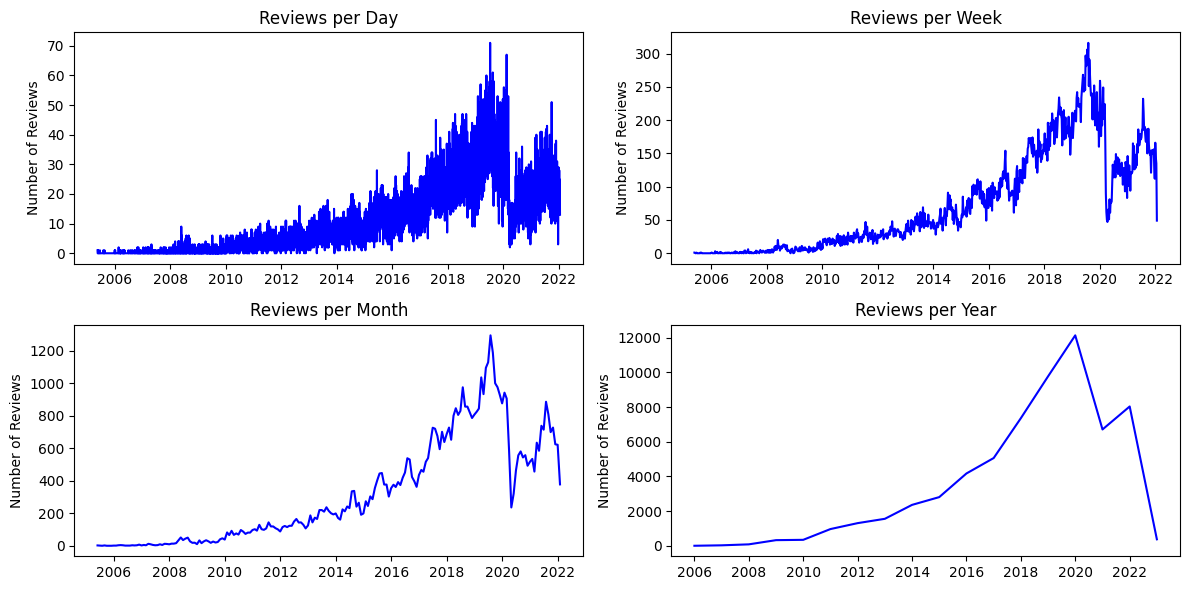

In [40]:
# time series plot for reviews

time_series_plot(reviews_per_day, reviews_per_week, reviews_per_month, reviews_per_year, content='Reviews')

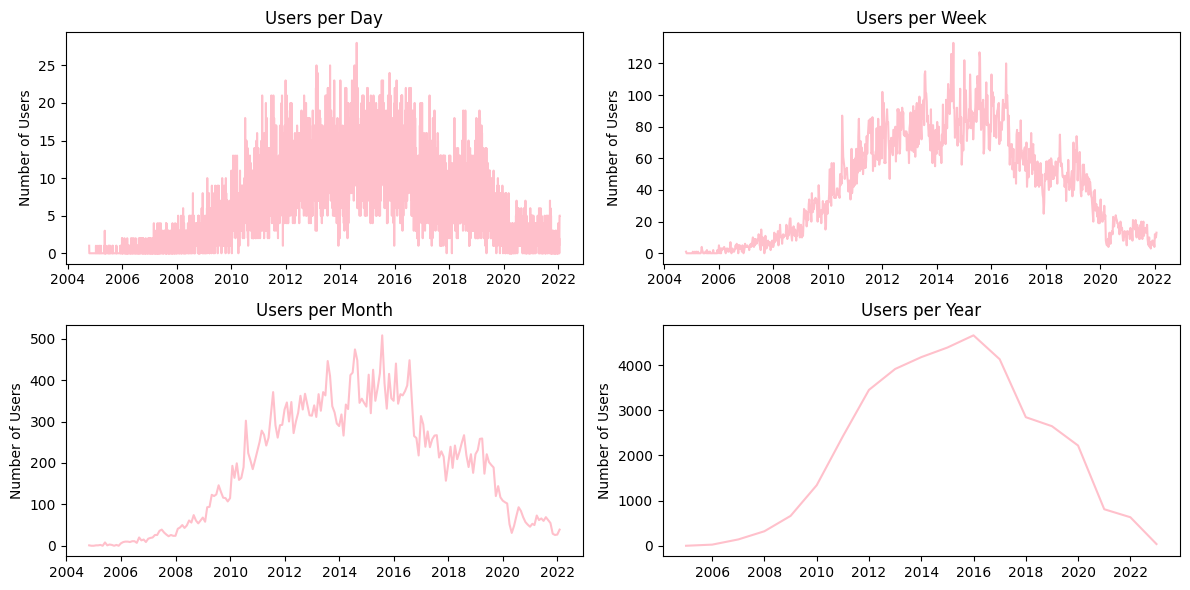

In [41]:
# time series plot for users

time_series_plot(users_per_day, users_per_week, users_per_month, users_per_year, content='Users')

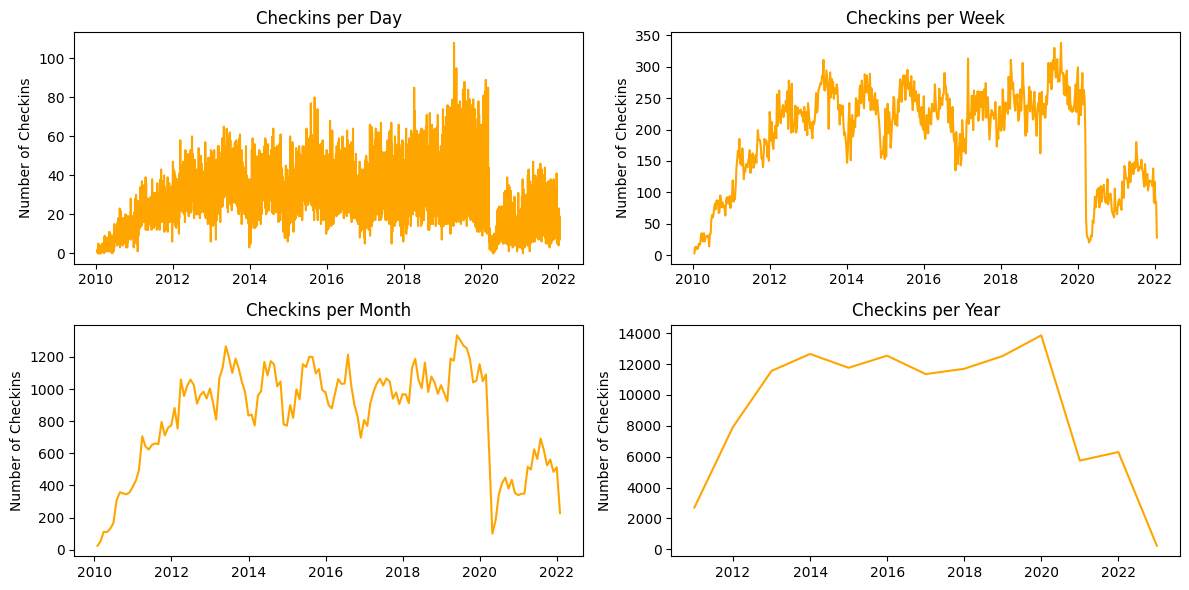

In [42]:
# time series plot for checkins

time_series_plot(checkins_per_day, checkins_per_week, checkins_per_month, checkins_per_year, content='Checkins')

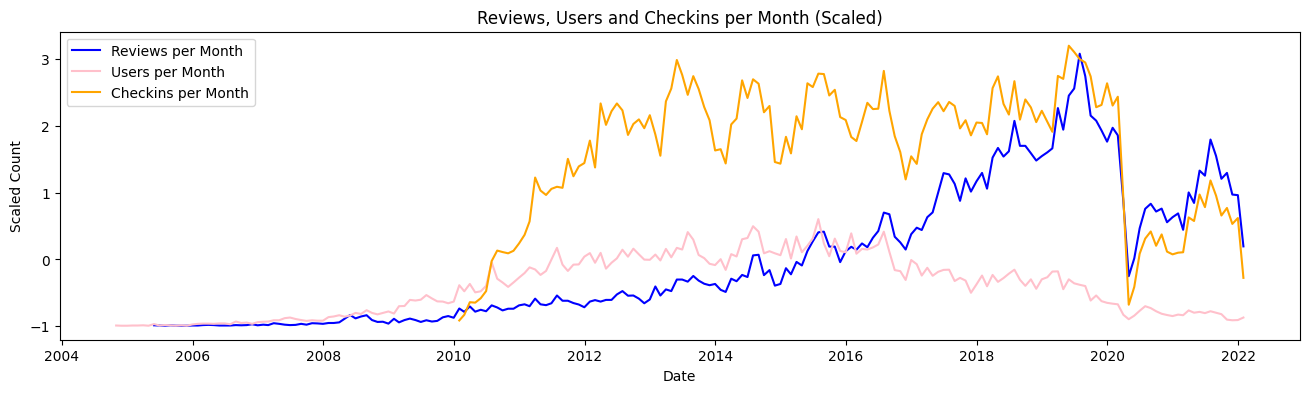

In [43]:
# comparison between reviews, users and checkins over time (with standardization)

scaler = StandardScaler()

reviews_per_month_scaled = scaler.fit_transform(reviews_per_month.values.reshape(-1, 1))
users_per_month_scaled = scaler.transform(users_per_month.values.reshape(-1, 1))
checkins_per_month_scaled = scaler.transform(checkins_per_month.values.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(reviews_per_month.index, reviews_per_month_scaled, color='blue', label='Reviews per Month')
ax.plot(users_per_month.index, users_per_month_scaled, color='pink', label='Users per Month')
ax.plot(checkins_per_month.index, checkins_per_month_scaled, color='orange', label='Checkins per Month')
ax.set_title('Reviews, Users and Checkins per Month (Scaled)')
ax.set_xlabel('Date')
ax.set_ylabel('Scaled Count')
ax.legend()
plt.show()

In [44]:
# save time series

review_ts.to_csv('review_ts.csv')
user_ts.to_csv('user_ts.csv')
checkin_ts.to_csv('checkin_ts.csv')